In [1]:
import numpy as np
import xarray as xr
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.io import loadmat
import gsw
from argopy import DataFetcher as ArgoDataFetcher 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
lon_w = -97.5
lon_e = -82.5
lat_s = 18
lat_n = 30

In [8]:
# da_dep = xr.open_dataset('/Users/jakesteinberg/Documents/NASA_OSTST/tile10_depth_est.nc')

In [4]:
argo_loader = ArgoDataFetcher()
ds = argo_loader.region([lon_w, lon_e, lat_s, lat_n, 0, 1000, '2010-01-01', '2011-12-31']).to_xarray()
ds_profiles = ds.argo.point2profile()

In [5]:
ds1 = argo_loader.region([lon_w, lon_e, lat_s, lat_n, 0, 1000, '2011-01-01', '2012-12-31']).to_xarray()
ds1_profiles = ds1.argo.point2profile()

In [6]:
ds12 = argo_loader.region([lon_w, lon_e, lat_s, lat_n, 0, 1000, '2013-01-01', '2013-12-31']).to_xarray()
ds12_profiles = ds12.argo.point2profile()

In [7]:
ds13 = argo_loader.region([lon_w, lon_e, lat_s, lat_n, 0, 1000, '2014-01-01', '2014-12-31']).to_xarray()
ds13_profiles = ds13.argo.point2profile()

In [8]:
ds2 = argo_loader.region([lon_w, lon_e, lat_s, lat_n, 0, 1000, '2015-01-01', '2015-12-31']).to_xarray()
ds2_profiles = ds2.argo.point2profile()

In [9]:
ds3 = argo_loader.region([lon_w, lon_e, lat_s, lat_n, 0, 1000, '2016-01-01', '2016-12-31']).to_xarray()
ds3_profiles = ds3.argo.point2profile()

In [10]:
ds4 = argo_loader.region([lon_w, lon_e, lat_s, lat_n, 0, 1000, '2017-01-01', '2017-12-31']).to_xarray()
ds4_profiles = ds4.argo.point2profile()

In [11]:
ds5 = argo_loader.region([lon_w, lon_e, lat_s, lat_n, 0, 1000, '2018-01-01', '2018-06-30']).to_xarray()
ds5_profiles = ds5.argo.point2profile()

In [12]:
ds52 = argo_loader.region([lon_w, lon_e, lat_s, lat_n, 0, 1000, '2018-07-01', '2018-12-31']).to_xarray()
ds52_profiles = ds52.argo.point2profile()

In [124]:
ds6 = argo_loader.region([lon_w, lon_e, lat_s, lat_n, 0, 1000, '2019-01-01', '2019-06-30']).to_xarray()
ds6_profiles = ds6.argo.point2profile()

In [125]:
ds62 = argo_loader.region([lon_w, lon_e, lat_s, lat_n, 0, 1000, '2019-07-01', '2019-12-31']).to_xarray()
ds62_profiles = ds62.argo.point2profile()

In [133]:
ds7 = argo_loader.region([lon_w, lon_e, lat_s, lat_n, 0, 1000, '2020-01-01', '2020-04-30']).to_xarray()
ds7_profiles = ds7.argo.point2profile()

In [135]:
ds72 = argo_loader.region([lon_w, lon_e, lat_s, lat_n, 0, 1000, '2020-05-01', '2020-08-31']).to_xarray()
ds72_profiles = ds72.argo.point2profile()

In [136]:
ds73 = argo_loader.region([lon_w, lon_e, lat_s, lat_n, 0, 1000, '2020-09-01', '2020-12-31']).to_xarray()
ds73_profiles = ds73.argo.point2profile()

In [149]:
ds8 = argo_loader.region([lon_w, lon_e, lat_s, lat_n, 0, 1000, '2021-01-01', '2021-03-31']).to_xarray()
ds8_profiles = ds8.argo.point2profile()

In [150]:
ds82 = argo_loader.region([lon_w, lon_e, lat_s, lat_n, 0, 1000, '2021-04-01', '2021-06-30']).to_xarray()
ds82_profiles = ds82.argo.point2profile()

In [153]:
ds83 = argo_loader.region([lon_w, lon_e, lat_s, lat_n, 0, 1000, '2021-07-01', '2021-09-30']).to_xarray()
ds83_profiles = ds83.argo.point2profile()

In [154]:
ds84 = argo_loader.region([lon_w, lon_e, lat_s, lat_n, 0, 1000, '2021-10-01', '2021-12-31']).to_xarray()
ds84_profiles = ds84.argo.point2profile()

In [193]:
ds_tot = xr.concat([ds_profiles,ds1_profiles,ds12_profiles,ds13_profiles,\
                    ds2_profiles,ds3_profiles,ds4_profiles,ds5_profiles,ds52_profiles,\
                    ds6_profiles,ds62_profiles,ds7_profiles,ds72_profiles,ds73_profiles,\
                    ds8_profiles,ds82_profiles,ds83_profiles,ds84_profiles],dim='N_PROF')
# # ds_profiles.to_netcdf(path='/Users/jakesteinberg/Desktop/argo_137E.nc',format="NETCDF4")

In [194]:
ds_tot.to_netcdf(path='/Users/jakesteinberg/Documents/NASA_OSTST/argo_2010_2021.nc')

In [3]:
ds_tot = xr.open_dataset('/Users/jakesteinberg/Documents/NASA_OSTST/argo_2010_2021.nc')

In [4]:
# 40 YEAR
tg_data_xl = loadmat('/Users/jakesteinberg/Documents/NASA_OSTST/tide_gauge/GOM_gauges_verylong_1970_2021.mat')
t_rec_xl = []; 
for i in range(len(tg_data_xl['t_grid'][0,:])):
    t_i_xl = datetime.fromordinal(tg_data_xl['t_grid'][0,i] - 366)
    t_rec_xl.append(t_i_xl)
data_da_xl = xr.DataArray(data=tg_data_xl['height_grid']/1000, dims=["location","time"],
                        coords=dict(
                            location=(["location"], tg_data_xl['ID'][0,:]), time=(["time"], t_rec_xl),
                            lon=(['location'], tg_data_xl['lon'][0,:]), lat=(['location'], tg_data_xl['lat'][0,:]),
                        ),        
                       )
id_tags = ['KEY WEST','NAPLES','FORT MYERS','ST. PETERSBURG','CLEARWATER BEACH', 'CEDAR KEY II', 'APALACHICOLA', 'PANAMA CITY', 'PENSACOLA', \
          'DAUPHIN ISLAND', 'MOBILE STATE DOCKS', 'BAY WAVELAND' ,'SHELL BEACH', 'GRAND ISLE', 'SABINE PASS', 'GALVESTON II PIER', \
          'USCG FREEPORT', 'CORPUS CHRISTI', 'PORT ISBEL']

In [5]:
id_tags_short = ['KEY WEST','NAPLES','FORT MYERS','ST. PETERSBURG','CLEARWATER BEACH', 'CEDAR KEY II', 'APALACHICOLA', 'PANAMA CITY, ST.ANDREWS BAY, FL', 'PENSACOLA', \
          'DAUPHIN ISLAND', 'MOBILE', 'BAY WAVELAND YACHT CLUB' ,'SHELL BEACH, LOUISIANA', 'GRAND ISLE', 'SABINE PASS', 'GALVESTON', \
          'FREEPORT', 'CORPUS CHRISTI, GULF MEXICO, TX', 'PORT ISABEL']

Text(0.5, 1.0, 'profiles per year')

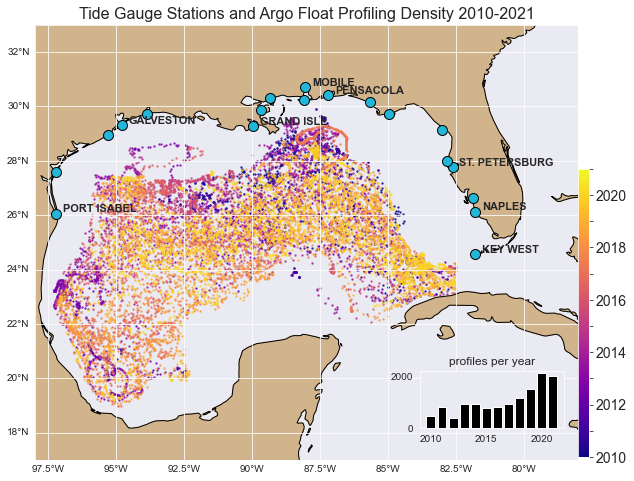

In [9]:
colors = ['r','b','y','k','c','m','g']
cmap = matplotlib.cm.get_cmap('plasma')
years = np.arange(2010,2022)
pcount = np.nan*np.ones(len(years))
f, ax = plt.subplots(1,1,figsize=(10,8), subplot_kw={'projection':ccrs.PlateCarree(central_longitude=0)})
# ax.contour(da_dep.lon,da_dep.lat,np.transpose(da_dep.Depth.data),levels=[150,1000],colors='k',linewidths=0.5)
for i in range(len(years)):
    t_s = str(years[i]) + '-01-01'
    t_e = str(years[i]) + '-12-31'
    ti = np.where((ds_tot.TIME > np.datetime64(t_s)) & (ds_tot.TIME < np.datetime64(t_e)))[0]
    t_lon = ds_tot.LONGITUDE.data[ti]
    t_lat = ds_tot.LATITUDE.data[ti]
    out = np.where((t_lon > -90) & (t_lat < 22))[0]
    t_lon[out] = np.nan
    t_lat[out] = np.nan
    pcount[i] = np.sum(~np.isnan(t_lon))
    ax.scatter(t_lon,t_lat, s=2, color=cmap(i/len(years)), transform=ccrs.PlateCarree(), alpha=0.7)
ax.add_feature(cartopy.feature.LAND, color='#D2B48C',zorder=1); ax.coastlines()
gl = ax.gridlines(draw_labels=True); gl.xlabels_top = False; gl.ylabels_right = False;
ax.set_xlim([-98, -78]); ax.set_ylim([17, 33])

for i in range(len(data_da_xl.lon)):
    ax.scatter(data_da_xl.lon[i],data_da_xl.lat[i],s=100,color='#22b6d8',edgecolors='k',zorder=3)
ii = [0,1,3,8,10,13,15,18]
for i in ii:
    ax.text(data_da_xl['lon'][i]+0.25,data_da_xl['lat'][i]+0.075,id_tags_short[i],fontsize=11,fontweight='bold')

cbpos = [0.89, 0.13, 0.015, 0.5]; cax = f.add_axes(cbpos); 
cb = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap, orientation = 'vertical', ticks=np.linspace(0,1,12))
cb.ax.set_yticklabels(['2010','','2012','','2014','','2016','','2018','','2020',''],fontsize=14)
ax.set_title('Tide Gauge Stations and Argo Float Profiling Density 2010-2021',fontsize=16)
ax.set_xlabel('Longitude',fontsize=14)
ax.set_ylabel('Latitude',fontsize=14)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

cbpos01 = [0.67, 0.18, 0.2, 0.1]
ax_i = f.add_axes(cbpos01)
ax_i.bar(years,pcount,color='k')
ax_i.set_title('profiles per year')
# f.savefig('/Users/jakesteinberg/Documents/NASA_OSTST/manuscript/r1/argo_profile_density.jpg', dpi=300)

In [9]:
da_dep

<xarray.Dataset>
Dimensions:  (lat: 270, lon: 270)
Coordinates:
  * lat      (lat) float32 70.1846 70.07401 69.96242 ... 14.184379 13.886529
  * lon      (lon) float32 -127.84196 -127.52573 ... -38.474277 -38.158054
Data variables:
    Depth    (lon, lat) float32 ...

In [12]:
float_num = np.unique(ds_tot.PLATFORM_NUMBER)

In [13]:
this_float = float_num[1]
test_temp = ds_tot.TEMP[np.where(ds_tot.PLATFORM_NUMBER==this_float)[0],:].data
test_time = ds_tot.TIME[np.where(ds_tot.PLATFORM_NUMBER==this_float)[0]].data
test_press = ds_tot.PRES[np.where(ds_tot.PLATFORM_NUMBER==this_float)[0]].data

Text(0.5, 1.0, '8.267676806209064')

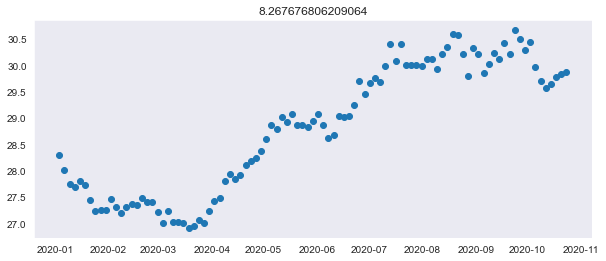

In [14]:
d_i = 5
f, ax = plt.subplots(1,1,figsize=(10,4))
ax.scatter(test_time,test_temp[:,d_i])
ax.set_title(str(np.nanmean(test_press[:,d_i].data)))

In [316]:
print(len(ds_tot.N_PROF))
print(len(np.where(ds_tot.PSAL_QC.data == 1)[0]))
print(len(np.where(ds_tot.POSITION_QC.data == 1)[0]))
print(len(np.where(ds_tot.TEMP_QC.data == 1)[0]))
print(len(np.where(ds_tot.TIME_QC.data == 1)[0]))

13145
12302
13145
13145
13145


In [19]:
np.shape(rho_nat)

(45,)

In [20]:
p_grid = np.arange(5,1000,20)
rho = np.nan*np.ones((len(p_grid),len(ds_tot.N_PROF.data)))
sa = np.nan*np.ones((len(p_grid),len(ds_tot.N_PROF.data)))
ct = np.nan*np.ones((len(p_grid),len(ds_tot.N_PROF.data)))
for i in range(len(ds_tot.N_PROF.data)):
    this_pressure = ds_tot.PRES[i,:]
    if np.nanmax(this_pressure > 950):
        if ds_tot.PSAL_QC[i].data == 1:
            this_temp = ds_tot.TEMP[i,:]
            this_salin = ds_tot.PSAL[i,:]
            good0 = np.where(~np.isnan(this_temp))[0]
            SA = gsw.SA_from_SP(this_salin[good0],this_pressure[good0],ds_tot.LONGITUDE[i],ds_tot.LATITUDE[i])
            CT = gsw.CT_from_t(SA,this_temp[good0],this_pressure[good0])
            rho_nat = gsw.rho(SA,CT,this_pressure)
            good = np.where(~np.isnan(rho_nat))[0]
            rho[:,i] = np.interp(p_grid,this_pressure[good],rho_nat[good])
            sa[:,i] = np.interp(p_grid,this_pressure[good],SA[good])
            ct[:,i] = np.interp(p_grid,this_pressure[good],CT[good])

In [23]:
# data_coords = {'pressure': p_grid, 'time': ds_tot.TIME.data}
# xda = xr.DataArray(data=rho, dims=['pressure','time'], coords=data_coords) 

# define data with variable attributes
data_vars = {'rho':(['pressure','time'], rho, {'units': 'kg/m^3'}), 'sa':(['pressure','time'], sa, {'units': 'g/kg'}), 'ct':(['pressure','time'], ct, {'units': 'degrees C'})}

# define coordinates
coords = {'pressure': (['pressure'], p_grid), 'time': (['time'],ds_tot.TIME.data),
         'lon': (['time'],ds_tot.LONGITUDE),'lat': (['time'],ds_tot.LATITUDE)}
ds_rho = xr.Dataset(data_vars=data_vars, 
                coords=coords)

In [24]:
ds_rho.to_netcdf(path='/Users/jakesteinberg/Documents/NASA_OSTST/argo_2010_2021_rho_sa_ct.nc')

In [22]:
gsw.CT_from_t?

Signature: gsw.CT_from_t(SA, t, p)
Docstring:
Calculates Conservative Temperature of seawater from in-situ
temperature.

Parameters
----------
SA : array-like
    Absolute Salinity, g/kg
t : array-like
    In-situ temperature (ITS-90), degrees C
p : array-like
    Sea pressure (absolute pressure minus 10.1325 dbar), dbar

Returns
-------
CT : array-like, deg C
    Conservative Temperature (ITS-90)
File:      ~/anaconda3/envs/cpt/lib/python3.7/site-packages/gsw/_wrapped_ufuncs.py
Type:      function
